# Chapter 4: Machine Learning state of the art
## Figure 4.15
Intuitive explanation of decision trees.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# 1. Classification tree

Let's first of all generate a dummy classification problem.

In [65]:
from sklearn.datasets import make_blobs

X_r, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=0)

Let's now fit a `DecisionTreeClassifier`

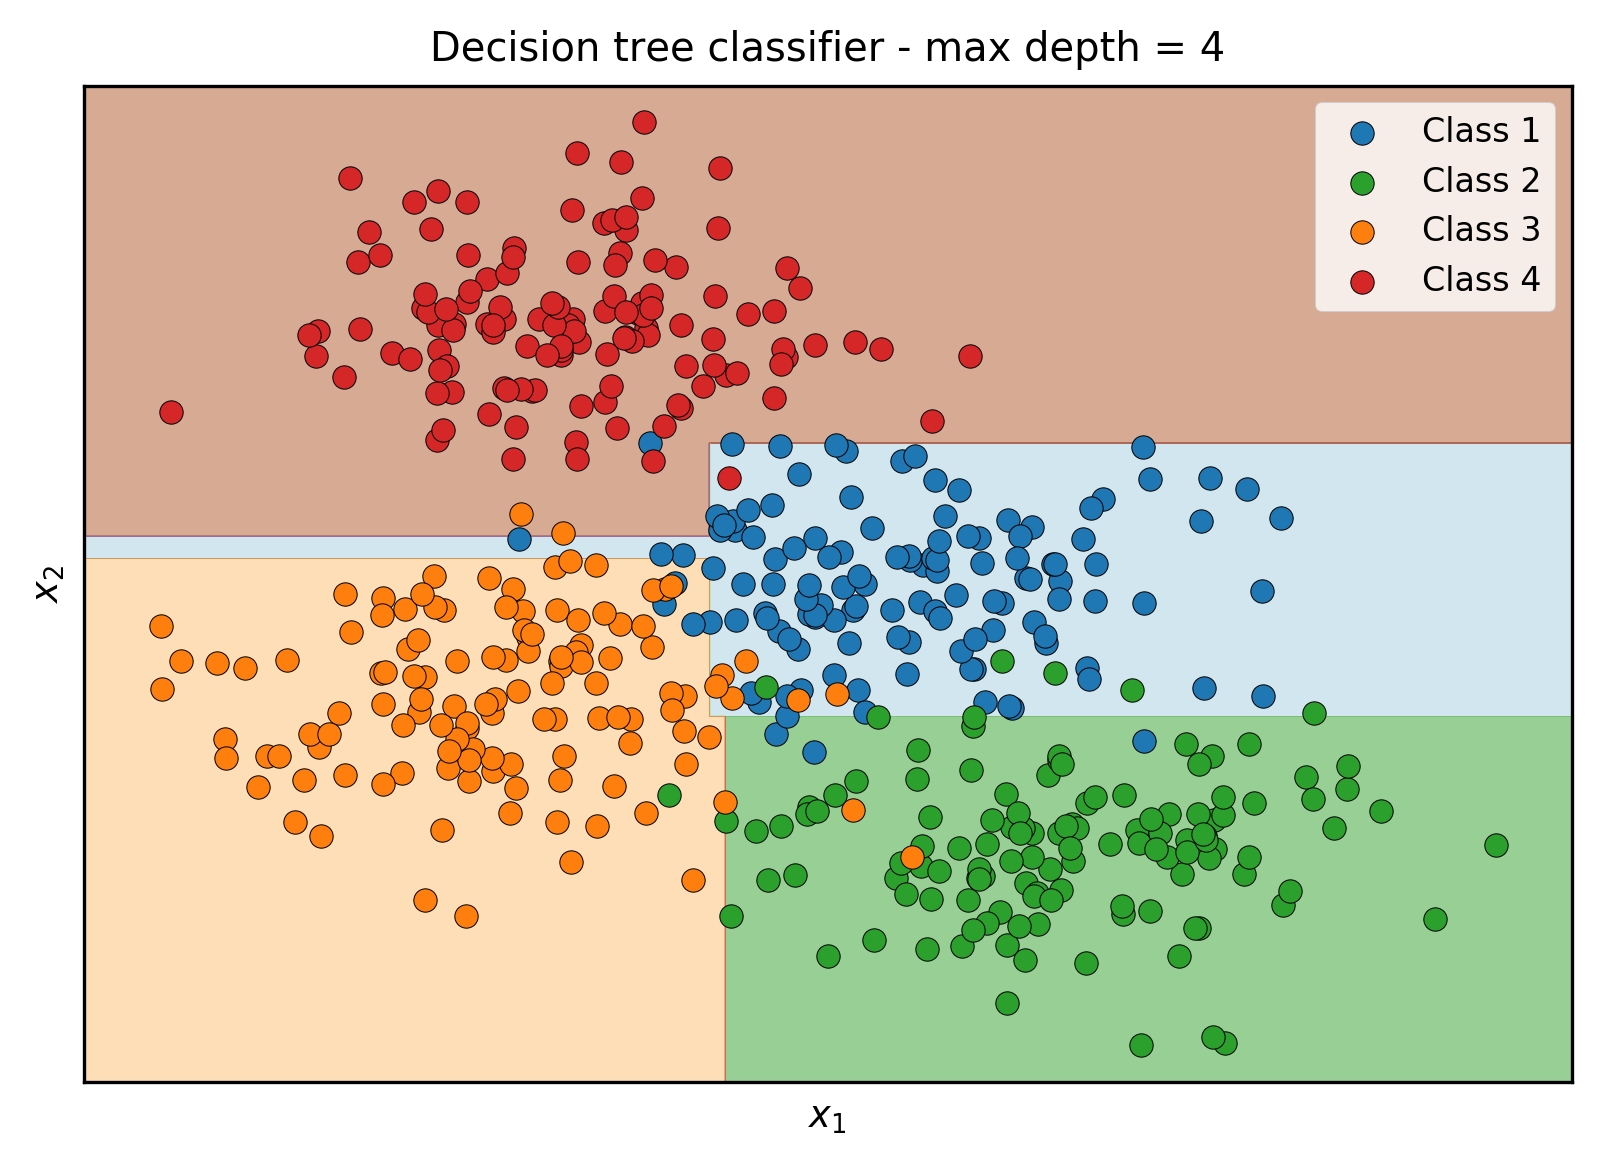

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

h = 0.01
x_min, x_max = X_r[:, 0].min() - .5, X_r[:, 0].max() + .5
y_min, y_max = X_r[:, 1].min() - .5, X_r[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': np.arange(1, 5)})
clf.fit(X_r, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(dpi=300)
plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.5)

x1 = X_r[:, 0]
x2 = X_r[:, 1]

colors = ['C0', 'C2', 'C1', 'C3']
for i in np.unique(y):
    idx = np.where(y == i)[0]
    plt.scatter(x1[idx], x2[idx], label='Class '+str(i+1),
                marker='o', edgecolors='k', c=colors[i])

plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xticks([])
plt.yticks([])
plt.title('Decision tree classifier - max depth = {}'.format(clf.best_estimator_.get_params()['max_depth']))
plt.savefig('../images/decsion_tree_classification.png');

# 2. Regression tree

Let's generate a dummy regression problem.

In [76]:
n_samples = 300
x = np.linspace(0, 2, n_samples)
noise = 0.25*np.random.randn(n_samples)
y = 2*np.sin(2*np.pi*x) + noise

Let's now fit a `DecisionTreeRegressor`

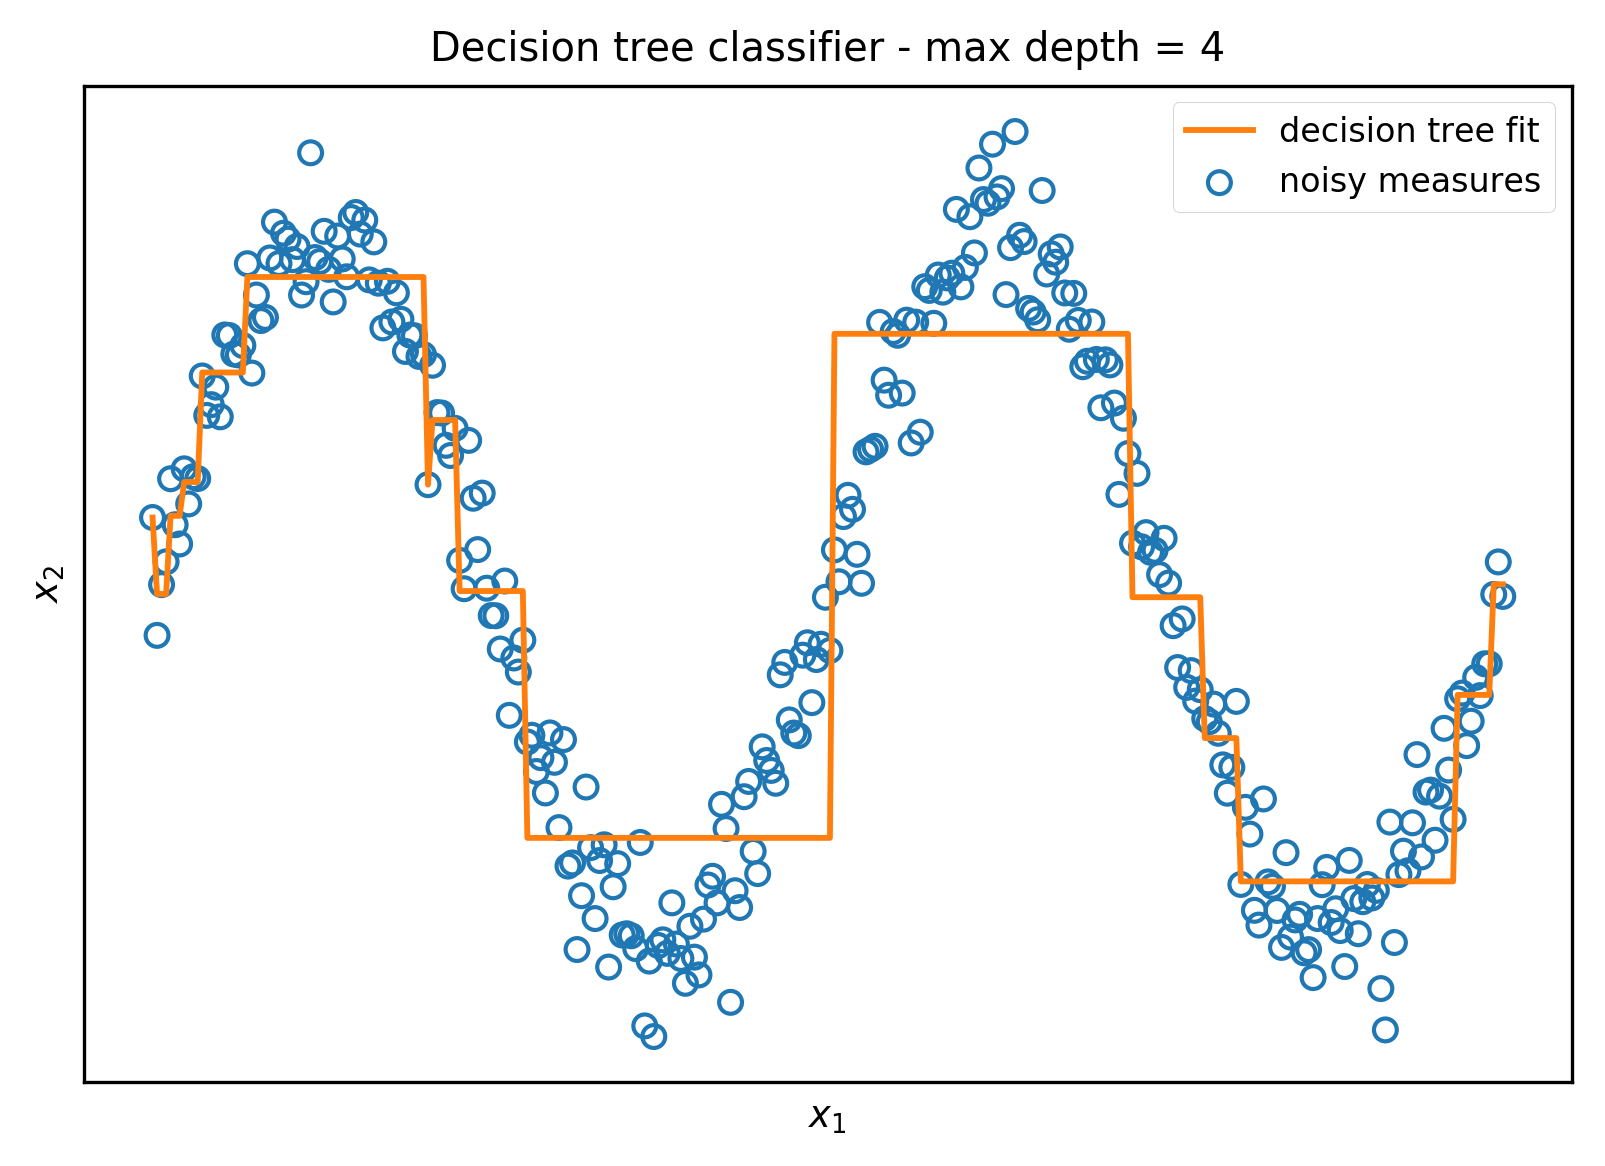

In [90]:
from sklearn.tree import DecisionTreeRegressor

mdl = DecisionTreeRegressor(max_depth=4)
mdl.fit(x.reshape(-1, 1), y.reshape(-1, 1))

y_pred = mdl.predict(x.reshape(-1, 1))

plt.figure(dpi=300)

plt.scatter(x, y, linewidth=1, alpha=1, s=30,
            facecolors='none', edgecolors='C0', label='noisy measures')
plt.plot(x, y_pred, color='C1', label='decision tree fit')

plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xticks([])
plt.yticks([])
plt.title('Decision tree classifier - max depth = {}'.format(mdl.get_params()['max_depth']))
plt.savefig('../images/decsion_tree_regression.png');